<a href="https://colab.research.google.com/github/mfathul21/marketing-campaign-analytics/blob/main/Marketing_Campaign_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank's Marketing Campaign Analytics**

## **Introduction**

In today's competitive financial landscape, effective marketing strategies are crucial for banks aiming to attract and retain customers for term deposits. This project analyzes a dataset from a time deposit campaign to derive actionable insights and recommendations for optimizing campaign effectiveness.

Through detailed analysis, this project aims to identify patterns and correlations that influence term deposit subscriptions. By leveraging these insights, banks can refine their marketing strategies to better target and engage potential customers. This approach not only enhances subscription rates but also improves resource allocation and customer retention efforts.

The recommendations derived from this analysis are tailored to enhance campaign efficiency, prioritize effective communication strategies, and maximize engagement with target demographics. Ultimately, this project aims to equip financial institutions with actionable insights to achieve better campaign outcomes and strengthen customer relationships in the competitive banking industry.

### **Dataset Information**

The "bank target marketing" dataset is a collection of data focused on a bank's marketing campaign to acquire deposits from customers. This dataset contains various attributes related to customer demographics, their previous interactions with the bank, and the outcomes of the marketing campaign conducted.

This dataset is valuable for analyzing the factors influencing customers' decisions to subscribe to term deposits, as well as for predicting customer behavior in future similar marketing campaigns. By understanding this dataset, banks or marketing analysts can optimize their marketing strategies to enhance the success of deposit campaigns in the future.

### **Attribute Information**

- **age**: The age of the customer. (Numerical)
- **job**: The occupation/employment status of the customer. (Categorical)
- **marital**: The marital status of the customer. (Categorical)
- **education**: The education level attained by the customer. (Categorical)
- **default**: Whether the customer has credit in default or not. (Categorical)
- **housing**: Whether the customer has a housing loan or not. (Categorical)
- **loan**: Has personal loan? (Categorical)
- **contact**: Type of communication used to contact customers (phone, cellular, etc.). (Categorical)
- **month**: Last contact month of year. (Categorical)
- **day_of_week**: Last contact day of the week. (Categorical)
- **duration**: Last contact duration in seconds. (Numerical)
- **campaign**: Number of contacts performed during this campaign for the customer. (Numerical)
- **pdays**: The number of days passed by after contact from the previous campaign. (Numerical)
- **previous**: Number of contacts performed before this campaign for the customer. (Numerical)
- **poutcome**: Outcome from the previous marketing campaign. (Categorical)
- **y**: Has the client subscribed a term deposit? (Categorical)

## Data Preprocessing

The Primary step in any modeling/analysis is the data preprocessing. To do the analysis, we need the data. I will download the data from Google Drive directly and this data is sourced from Kaggle. Here is the link for to download the dataset [click here](https://drive.google.com/uc?export=download&id=1Em0JDdRqMzskQ_sEv1G2iwhmNg2mJ_HZ)

First import all the necessary libraries and load the data.

### **Import Library and Load Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
link_to_data = 'https://drive.google.com/uc?export=download&id=1Em0JDdRqMzskQ_sEv1G2iwhmNg2mJ_HZ'
df = pd.read_csv(link_to_data)

In [ ]:
bank = df.copy()
bank.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
10885,34,student,single,university.degree,no,no,no,cellular,aug,thu,387,1,999,0,nonexistent,no
27013,57,unemployed,married,basic.4y,no,no,no,cellular,jun,mon,651,1,999,0,nonexistent,yes
3539,47,blue-collar,married,basic.6y,no,no,yes,telephone,may,wed,191,2,999,0,nonexistent,no
19133,34,blue-collar,married,basic.6y,no,no,no,cellular,may,wed,127,1,999,0,nonexistent,no
32850,56,services,married,high.school,unknown,yes,no,telephone,jun,wed,75,14,999,0,nonexistent,no


### **Checking the Data Types**

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


We have 32950 rows of data with 16 features (including independent and dependent variables) consisting of 5 numerical features and 11 categorical features.

In [ ]:
num_col = bank.select_dtypes(include=np.number).columns.tolist()
cat_col = bank.select_dtypes(include='object').columns.tolist()

In [ ]:
bank[num_col].head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [ ]:
bank[cat_col].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no


See that we have the correct data types for all the features.

### **Checking for Inconsistent or Invalid Values**

**Categorical Features**

In [ ]:
bank[cat_col].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


In [ ]:
for col in cat_col:
    print(f'{col} :\n{bank[col].unique()}\n')

job :
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']

marital :
['married' 'divorced' 'single' 'unknown']

education :
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']

default :
['unknown' 'no' 'yes']

housing :
['no' 'yes' 'unknown']

loan :
['no' 'yes' 'unknown']

contact :
['cellular' 'telephone']

month :
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']

day_of_week :
['wed' 'mon' 'tue' 'fri' 'thu']

poutcome :
['nonexistent' 'failure' 'success']

y :
['no' 'yes']



Take a look for some categorical feature such as job, marital, education, and default have strange 'unknown' values which indicate that the data is missing or undefined. Therefore, these values will be handled in the next step to handle missing values to be removed or imputed. In addition, in the job feature there is an inconsistent or mistyped value of 'admin.', so it needs to be changed to 'admin' only.

In [ ]:
bank['job'].replace('admin.', 'admin', inplace=True)
bank['job'].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

**Numerical Features**

In [ ]:
df[num_col].describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Look, at the pdays feature which has a majority value of 999 and at first glance it looks like an invalid value. However, if you pay attention to the information attribute regarding pdays, it is the number of days since the customer was last contacted from the previous campaign. Therefore, we can indicate the value 999 as indicating that this is the first time the customer has participated in or joined a bank campaign, so it can be concluded that the value 999 is not an invalid value.

So for numerical features we also don't have invalid values.

### **Checking for missing values and clean**

In [ ]:
bank.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Using the .isna() method we can see that we have no missing values, but if you remember in the previous step we found an 'unknown' value that indicated a missing value. so, we'll handle it for that value.

In [ ]:
df_missing = pd.DataFrame()
df_missing['feature'] = bank.columns.values
df_missing['sum_of_unknown'] = bank.isin(['unknown']).sum().values
df_missing['rate_of_unknown'] = df_missing['sum_of_unknown'] / bank.shape[0]
df_missing = df_missing.sort_values(by='rate_of_unknown', ascending=False).reset_index(drop=True)
df_missing[df_missing['rate_of_unknown'] > 0]

,feature,sum_of_unknown,rate_of_unknown
0,default,6940,0.210622
1,education,1397,0.042398
2,housing,796,0.024158
3,loan,796,0.024158
4,job,265,0.008042
5,marital,65,0.001973


For missing (unknown) values ​​on marital and job features we can reduce them because the level of ignorance is very small, namely less than 1%. Meanwhile, for features whose loss value is less than 10%, we can calculate the value using feature mode without known value. Additionally, if the missing values ​​are more than 10% like the default feature, we can remove the feature to avoid bias in model development.

In [ ]:
# drop rows (unknown value less than 1%)
bank = bank[~(bank['marital'] == 'unknown')]
bank = bank[~(bank['job'] == 'unknown')]

# imputation data with mode (unknown value less than 10%)
unknown_loan = bank[bank['loan']!='unknown']['loan']
unknown_housing = bank[bank['housing']!='unknown']['housing']
unknown_education = bank[bank['education']!='unknown']['education']
bank['loan'] = bank['loan'].apply(lambda x: x if x != 'unknown' else unknown_loan.mode()[0])
bank['housing'] = bank['housing'].apply(lambda x: x if x != 'unknown' else unknown_housing.mode()[0])
bank['education'] = bank['education'].apply(lambda x: x if x != 'unknown' else unknown_education.mode()[0])

# drop columns (unknown value over than 10%)
bank.drop(['default'], axis=1, inplace=True)

# check unknown values
bank.isin(['unknown']).sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Now we have data that is clean of missing values.

### **Checking and handling for data duplicated**

In [ ]:
bank.duplicated().sum()

9

In [ ]:
bank.drop_duplicates(inplace=True)
bank.duplicated().sum()

0

We have duplicate data, so we can deduplicate this data.

## **Exploratory Data Analysis**

Before jumping into the Modeling, it is always important and necessary to explore the data. This helps us to understand the data and the business better.

Exploratory data analysis helps us to answer questions such as:
- What are the characteristics of customers who are participants in the term deposit campaign?
- How does the customer's age preference affect his or her opportunity to subscribe to a term deposit?
- Generally, customers who decide to subscribe to term deposits from this campaign do what they do?
- Are customers with married marital status more likely to subscribe to term deposits?
- Are there differences in education levels in customers' decisions to subscribe to term deposits?
- Are customers who have a housing loan (KPR) or have a personal loan more likely to subscribe to a term deposit? how does it affect?
- How does the timing of the campaign, such as the day of the week, affect customers' decisions to subscribe or not? does it have any influence? then what about the moon?
- How does the last duration and number of times carried out during this contact campaign influence the customer's decision to subscribe to a term deposit?
- How do the results of previous campaigns influence the success of the current campaign, namely term deposits?

### **Univariate Analysis**

**What are the characteristics of customers who are participants in the term deposit campaign?**

In [ ]:
print(f'List of numerical features: \n{num_col}')

List of numerical features: 
['age', 'duration', 'campaign', 'pdays', 'previous']


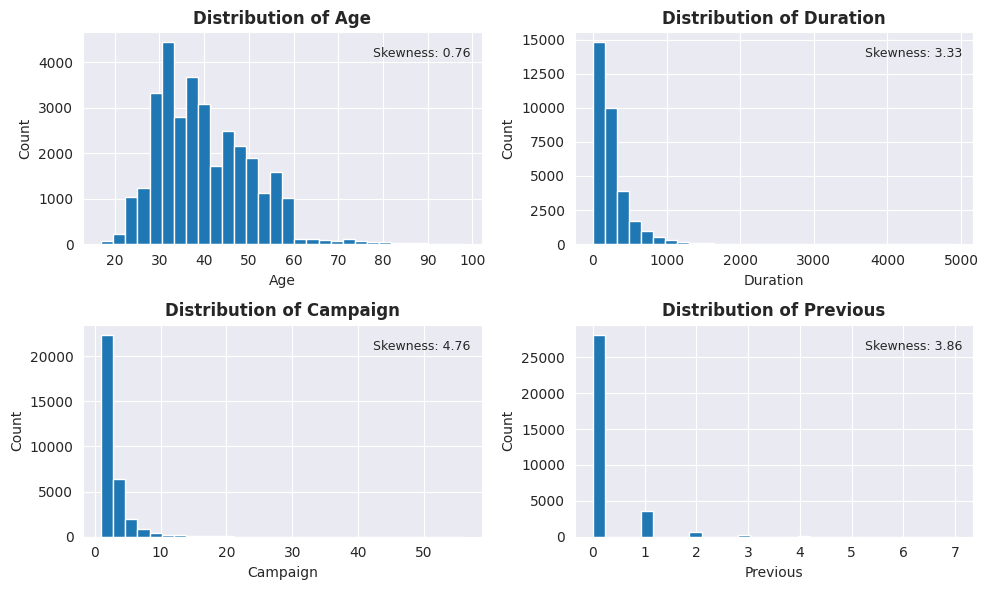

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.hist(bank['age'], bins=30)
ax1.set_title('Distribution of Age', fontdict={'weight':'bold'})
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2.hist(bank['duration'], bins=30)
ax2.set_title('Distribution of Duration', fontdict={'weight':'bold'})
ax2.set_xlabel('Duration')
ax2.set_ylabel('Count')

ax3.hist(bank['campaign'], bins=30)
ax3.set_title('Distribution of Campaign', fontdict={'weight':'bold'})
ax3.set_xlabel('Campaign')
ax3.set_ylabel('Count')

ax4.hist(bank['previous'], bins=30)
ax4.set_title('Distribution of Previous', fontdict={'weight':'bold'})
ax4.set_xlabel('Previous')
ax4.set_ylabel('Count')

age_skew, duration_skew, campaign_skew, previous_skew = bank[['age','duration','campaign', 'previous']].skew().values
ax1.text(0.85, 0.90, f'Skewness: {age_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax1.transAxes)
ax2.text(0.85, 0.90, f'Skewness: {duration_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax2.transAxes)
ax3.text(0.85, 0.90, f'Skewness: {campaign_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax3.transAxes)
ax4.text(0.85, 0.90, f'Skewness: {previous_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax4.transAxes)

plt.tight_layout()
plt.show()

- Participants in the time deposit campaign were predominantly customers aged 30-40 years.
- The duration of contact made was mostly less than 10 minutes, but there were a small number of customers with contact duration of more than 30 minutes and even 1 hour.
- The number of contacts made to each customer during the campaign was positively skewed indicating that the majority of contacts made were small.
- The number of contacts made before the campaign also shows a positive skew with the majority of customers having never been contacted before (value 0).

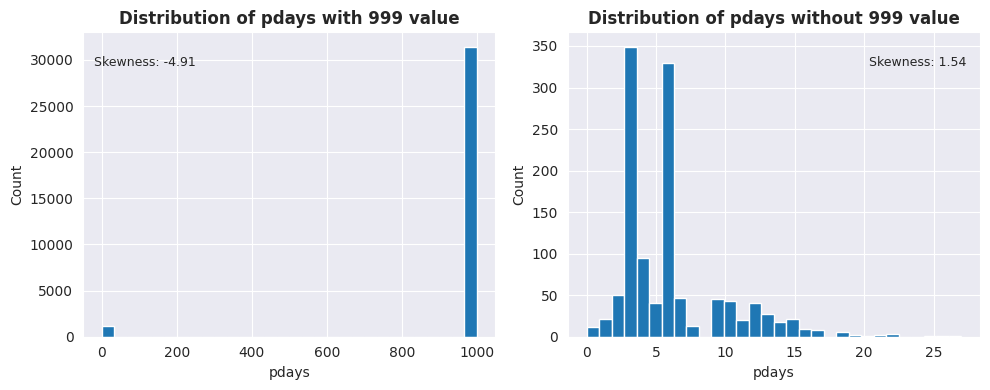

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1, ax2 = ax.flatten()

ax1.hist(bank['pdays'], bins=30)
ax1.set_xlabel('pdays')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of pdays with 999 value', fontdict={'weight':'bold'})

ax2.hist(bank[bank['pdays']!=999]['pdays'], bins=30)
ax2.set_xlabel('pdays')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of pdays without 999 value', fontdict={'weight':'bold'})

pdays_skew = bank['pdays'].skew()
pdays_999_skew = bank[bank['pdays']!=999]['pdays'].skew()
ax1.text(0.15, 0.90, f'Skewness: {pdays_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax1.transAxes)
ax2.text(0.85, 0.90, f'Skewness: {pdays_999_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax2.transAxes)


plt.tight_layout()
plt.show()

In [ ]:
bank[bank['pdays']==999]['poutcome'].value_counts()

poutcome
nonexistent    28132
failure         3282
Name: count, dtype: int64

In [ ]:
bank[bank['pdays']==999]['previous'].value_counts()

previous
0    28132
1     2954
2      275
3       41
4       10
5        1
6        1
Name: count, dtype: int64

In [ ]:
bank[bank['poutcome']=='nonexistent']['previous'].value_counts()

previous
0    28132
Name: count, dtype: int64

In [ ]:
bank[bank['poutcome']=='nonexistent']['pdays'].value_counts()

pdays
999    28132
Name: count, dtype: int64

Note that for the number of days after contact from the previous campaign, the majority of them have a value of 999, which indicates that the time is very long or that no contact or campaign has been made to customers with a value of 999 before. In addition, **ignoring the 999 value**, it was found that most customers were contacted one week after the previous campaign.

In [ ]:
cat_col.remove('default')
print(f'List of categorical features: \n{cat_col}')

List of categorical features: 
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


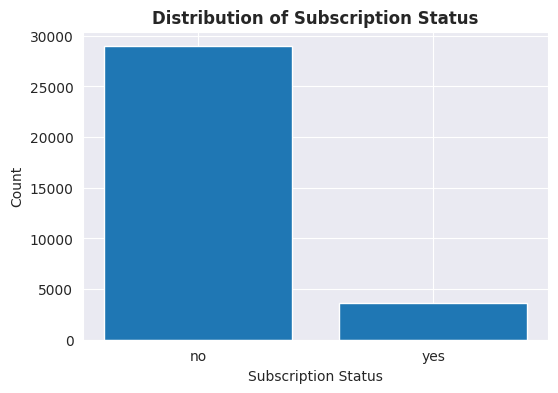

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(bank['y'].value_counts().index, bank['y'].value_counts().values)
plt.title('Distribution of Subscription Status', fontdict={'weight':'bold'})
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

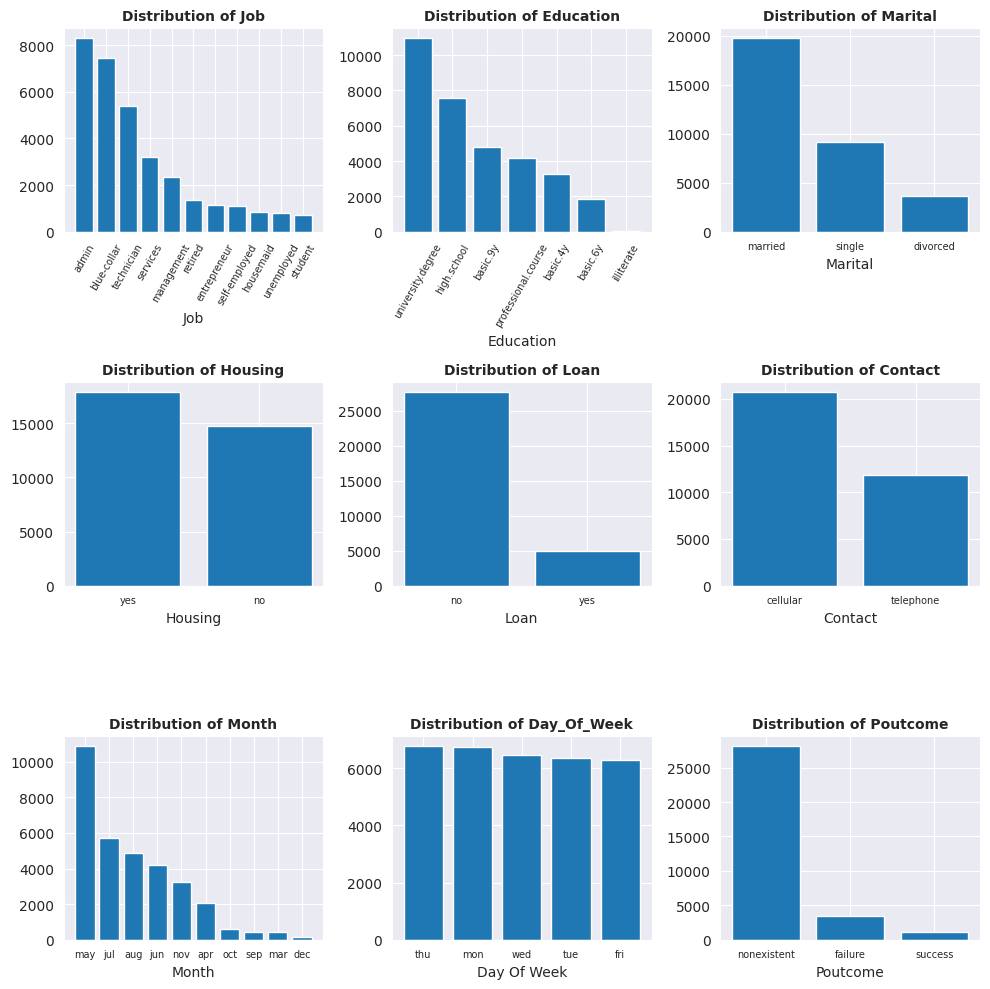

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()

set_ax1, set_ax2, set_ax3 = (ax1, 'job'), (ax2, 'education'), (ax3, 'marital')
set_ax4, set_ax5, set_ax6 = (ax4, 'housing'), (ax5, 'loan'), (ax6, 'contact')
set_ax7, set_ax8, set_ax9 = (ax7, 'month'), (ax8, 'day_of_week'), (ax9, 'poutcome')
list_axis = [set_ax1, set_ax2, set_ax3, set_ax4, set_ax5, set_ax6, set_ax7, set_ax8, set_ax9]

for axis, col in list_axis:
  axis.bar(bank[col].value_counts().index, bank[col].value_counts().values)
  axis.set_title(f'Distribution of {col.title()}', fontdict={'fontsize':10, 'weight':'bold'})
  axis.set_xlabel(col.title().replace('_', ' '))
  axis.set_xticks(ticks=range(len(bank[col].value_counts().index)),
                  labels=bank[col].value_counts().index,
                  fontdict={'fontsize':7}, rotation=60 if (col == 'job')|(col == 'education') else 0)

plt.tight_layout()
plt.show()

- Most popular occupation among campaign participants is admin.
- Majority of campaign participants have a university degree level of education.
- Campaign participants are predominantly married customers.
- Most campaign participants have housing loans, but the majority do not have personal loans.
- Contact during the campaign is mostly done using cellular communication.
- The highest campaign activity occurs in May.
- Campaign execution takes place on weekdays (Monday to Friday) with even distribution.
- The majority of previous campaign outcomes are not available, indicating that most participants are new to the campaign.

### **Bivariate Analysis**

**How does the customer's age preference affect his or her opportunity to subscribe to a term deposit?**

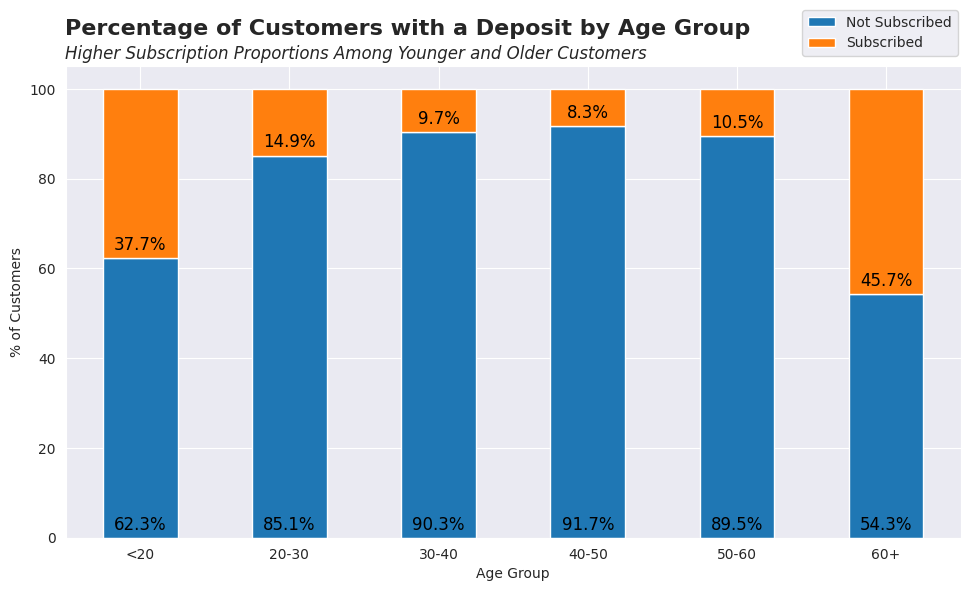

In [ ]:
bins_age = [0, 20, 30, 40, 50, 60, np.inf]
labels_age = ['<20','20-30', '30-40', '40-50', '50-60','60+']
bank['age_group'] = pd.cut(bank['age'], bins=bins_age, labels=labels_age)

df_age = bank.groupby('age_group')['y'].value_counts()
df_age_percentage = (df_age / df_age.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_age_percentage.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Age Group')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Age Group", fontsize=16, fontweight='bold')
plt.figtext(0.07, 0.895, "Higher Subscription Proportions Among Younger and Older Customers",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))
plt.tight_layout()
plt.show()

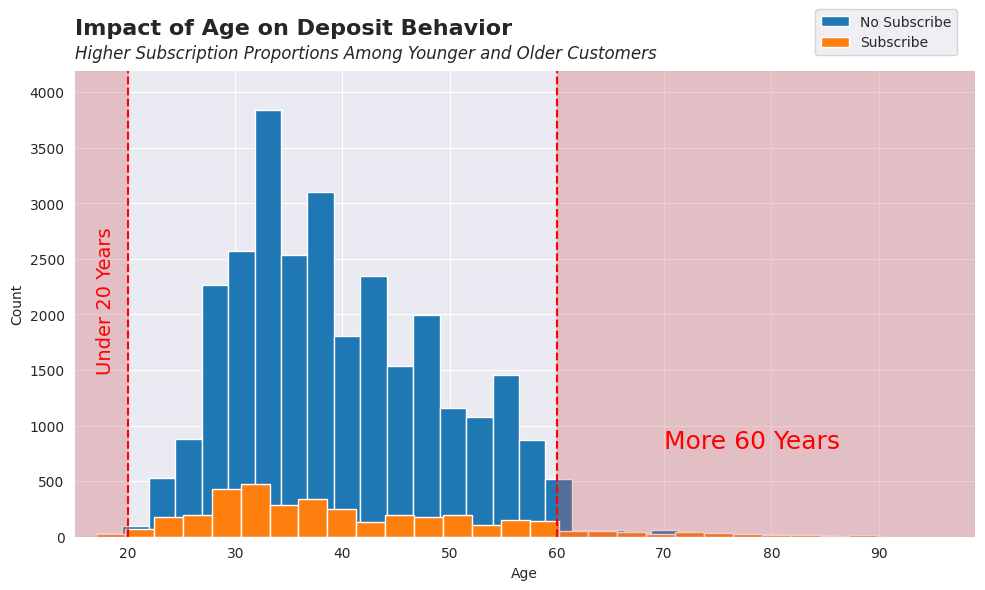

In [ ]:
plt.figure(figsize=(10,6))

plt.hist(data=bank[bank['y']=='no'], x='age', bins=30)
plt.hist(data=bank[bank['y']=='yes'], x='age', bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(15, 99)
plt.ylim(0,4200)

plt.legend(['No Subscribe', 'Subscribe'], loc=2, bbox_to_anchor=(0.815, 1.145))

plt.figtext(0.08, 0.935, "Impact of Age on Deposit Behavior", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Higher Subscription Proportions Among Younger and Older Customers",
            fontsize=12, style='italic')

plt.axvline(20, ls='--', color='red')
plt.text(x=17, y=1500, s='Under 20 Years', fontsize=14, color='red', rotation=90)
plt.stackplot(np.arange(0,21,1), [[4200]], color='indianred', alpha=0.3)

plt.axvline(60, ls='--', color='red')
plt.text(x=70, y=800, s='More 60 Years', fontsize=18, color='red', rotation=0)
plt.stackplot(np.arange(60,100,1), [[4200]], color='indianred', alpha=0.3)

plt.tight_layout()
plt.show()

**Generally, customers who decide to subscribe to term deposits from this campaign have what occupation?**

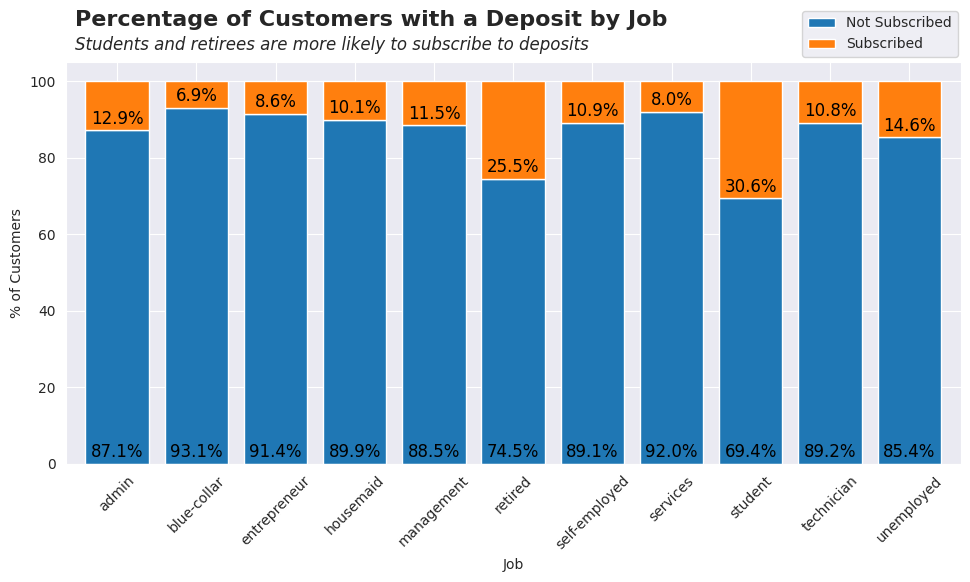

In [ ]:
df_job = bank.groupby('job')['y'].value_counts()
df_percentage = (df_job / df_job.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Job')
plt.ylabel('% of Customers')
plt.xticks(rotation=45)
plt.figtext(0.08, 0.935, "Percentage of Customers with a Deposit by Job", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Students and retirees are more likely to subscribe to deposits",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.145))
plt.tight_layout()
plt.show()

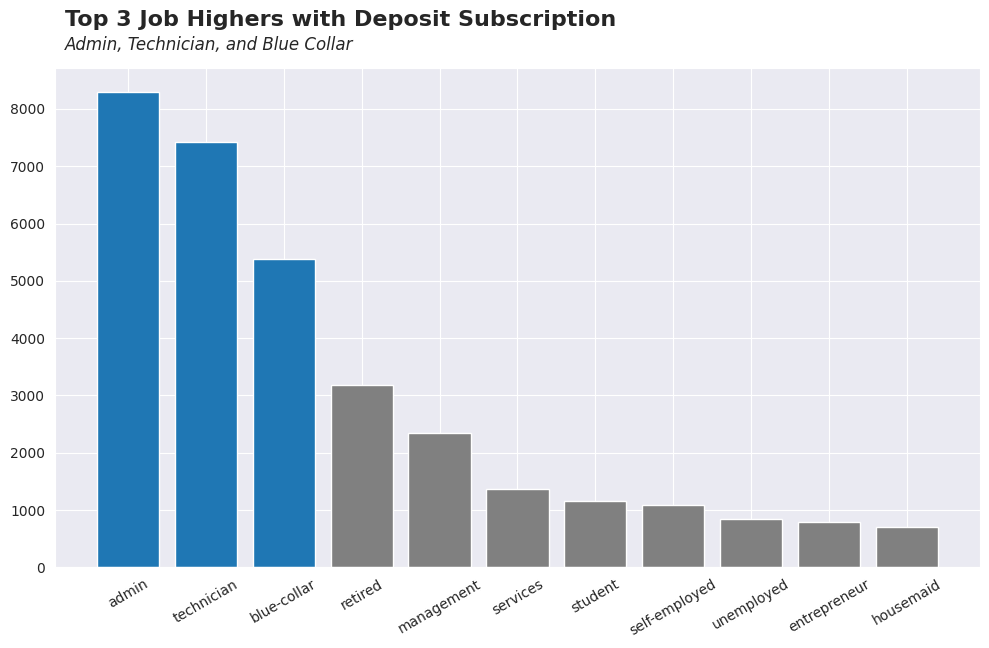

In [ ]:
plt.figure(figsize=(10,6))

top_3_jobs = bank[bank['y'] == 'yes']['job'].value_counts().nlargest(3).index
colors = ['#808080' if job not in top_3_jobs else '#1f77b4'
          for job in bank[bank['y'] == 'yes']['job'].value_counts().index]
plt.bar(bank[bank['y'] == 'yes']['job'].value_counts().index, bank['job'].value_counts().values, color=colors)
plt.xticks(rotation=30)

plt.figtext(0.07, 1.045, "Top 3 Job Highers with Deposit Subscription", fontsize=16, fontweight='bold')
plt.figtext(0.07, 1.005, "Admin, Technician, and Blue Collar",
            fontsize=12, style='italic')

plt.tight_layout()
plt.show()

**Are customers with married marital status more likely to subscribe to term deposits?**

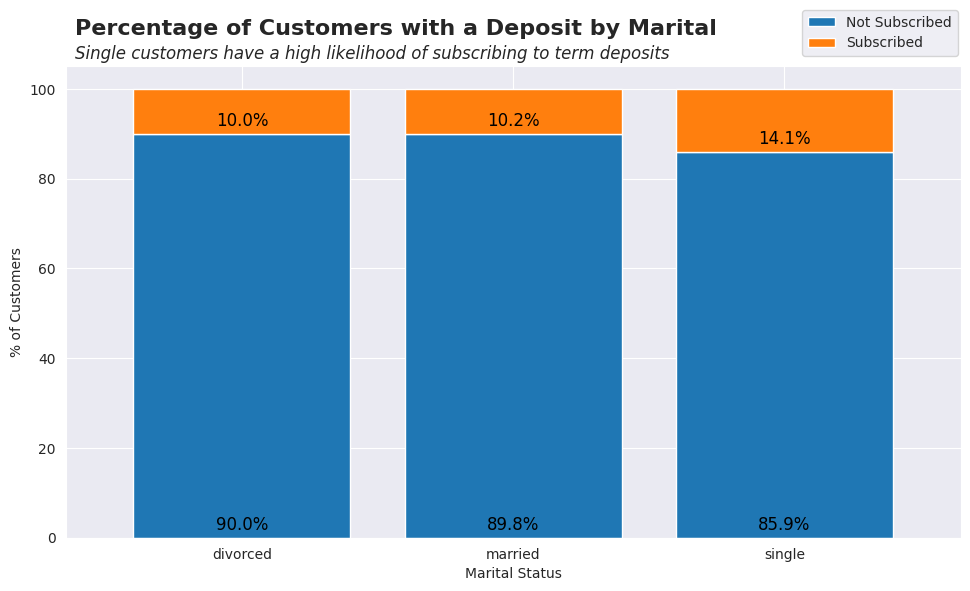

In [ ]:
df_marital = bank.groupby('marital')['y'].value_counts()
df_percentage = (df_marital / df_marital.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Marital Status')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.08, 0.935, "Percentage of Customers with a Deposit by Marital", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Single customers have a high likelihood of subscribing to term deposits",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))
plt.tight_layout()
plt.show()

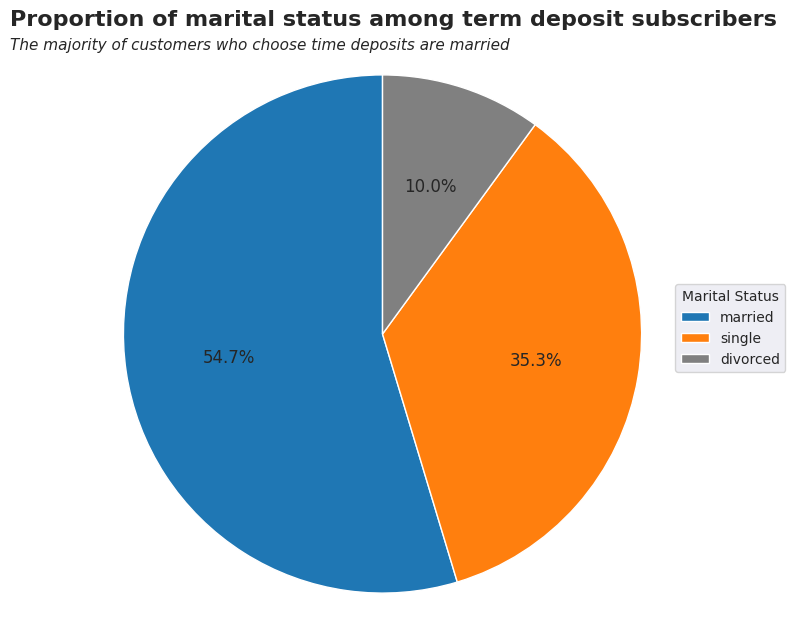

In [ ]:
subscribed = bank[bank['y'] == 'yes']
marital_counts = subscribed['marital'].value_counts()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(marital_counts, labels=None,
                                    autopct='%1.1f%%', startangle=90,
                                    colors=['#1f77b4', '#ff7f0e', '#808080'])

plt.figtext(0, 1.015, "Proportion of marital status among term deposit subscribers", fontsize=16, fontweight='bold')
plt.figtext(0, 0.975, "The majority of customers who choose time deposits are married",
            fontsize=11, style='italic')

plt.axis('equal')
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.legend(wedges, marital_counts.index, title='Marital Status',
           bbox_to_anchor=(0.90, 0.60),
           fontsize=10)

plt.tight_layout()
plt.show()

**Are there differences in education levels in customers' decisions to subscribe to term deposits?**

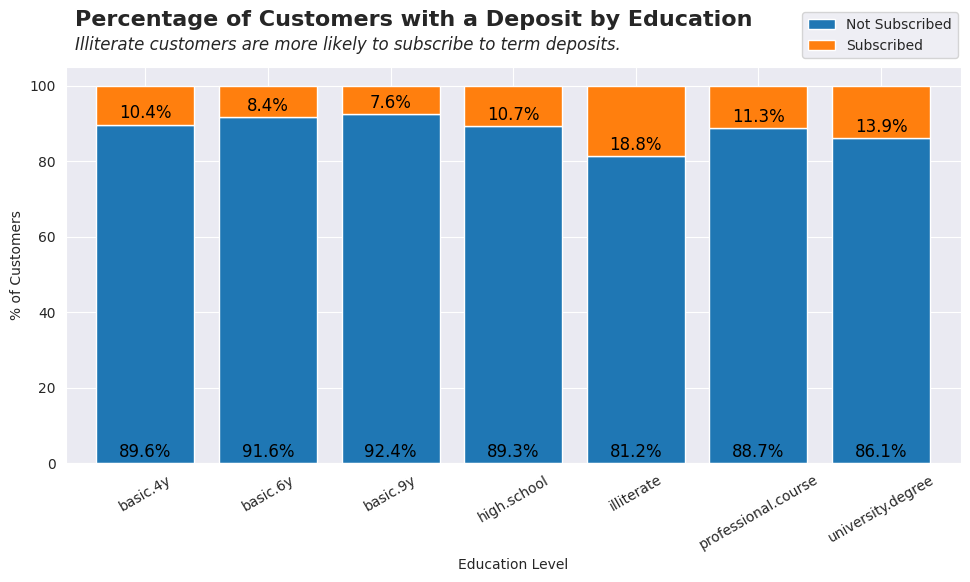

In [ ]:
df_education = bank.groupby('education')['y'].value_counts()
df_percentage = (df_education / df_education.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Education Level')
plt.ylabel('% of Customers')
plt.xticks(rotation=30)
plt.figtext(0.08, 0.935, "Percentage of Customers with a Deposit by Education", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Illiterate customers are more likely to subscribe to term deposits.",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

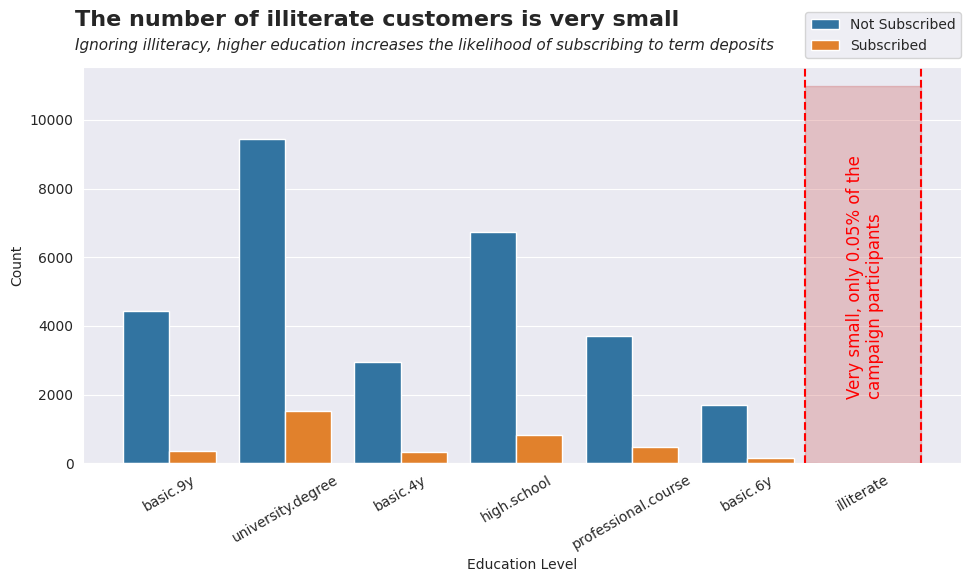

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=bank, x='education', hue='y')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.figtext(0.08, 0.935, "The number of illiterate customers is very small", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Ignoring illiteracy, higher education increases the likelihood of subscribing to term deposits",
            fontsize=11, style='italic')

plt.xticks(rotation=30)

plt.axvline(5.5, ls='--', color='red')
plt.axvline(6.5, ls='--', color='red')
plt.text(x=5.85, y=2000, s=f"Very small, only {round(bank['education'].value_counts(normalize=True).loc['illiterate']*100, 2)}% of the\ncampaign participants",
         fontsize=12, color='red', rotation=90)
plt.stackplot(np.arange(5.5,7.5,1), [[11000]], color='indianred', alpha=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

**Are customers who have a housing loan (KPR) or have a personal loan more likely to subscribe to a term deposit? how does it affect?**

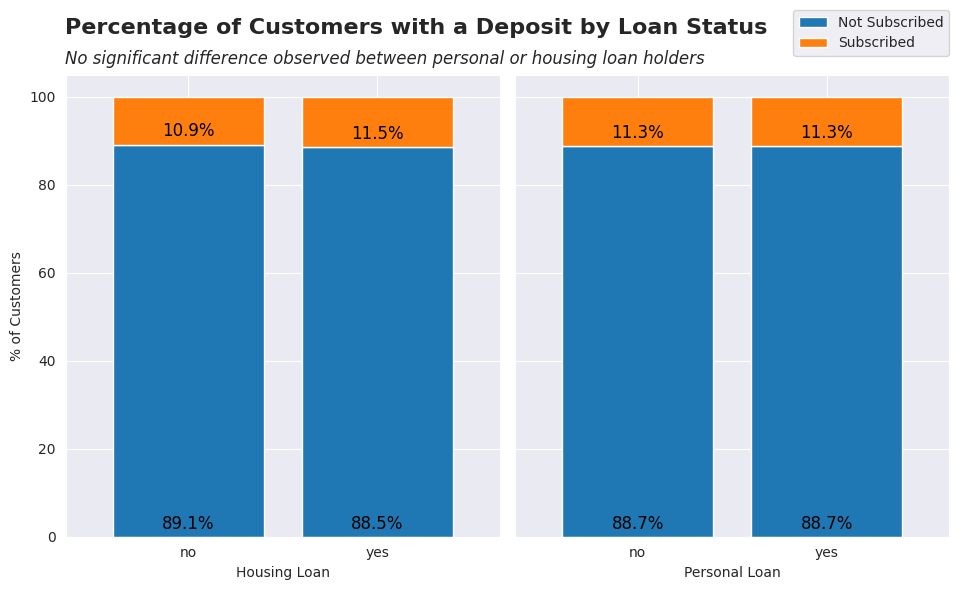

In [ ]:
df_housing = bank.groupby(['housing'])['y'].value_counts()
df_loan = bank.groupby('loan')['y'].value_counts()
df_housing_percentage = (df_housing / df_housing.groupby(level=0).sum()) * 100
df_loan_percentage = (df_loan / df_loan.groupby(level=0).sum()) * 100

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
df_housing_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax1)
df_loan_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax2)
ax1.set(xlabel='Housing Loan', ylabel='% of Customers')
ax2.set(xlabel='Personal Loan')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Loan Status", fontsize=16, fontweight='bold')
plt.figtext(0.39, 0.885, "No significant difference observed between personal or housing loan holders",
            ha='center', fontsize=12, style='italic')

for ax in [ax1, ax2]:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                        ha='center', va='center',
                        xytext=(0, 0),
                        textcoords='offset points',
                        fontsize=12,
                        color='black')

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.625, 1.155))
plt.tight_layout()
plt.show()

**How does the timing of the campaign, such as the day of the week, affect customers' decisions to subscribe or not? does it have any influence? then what about the month?**

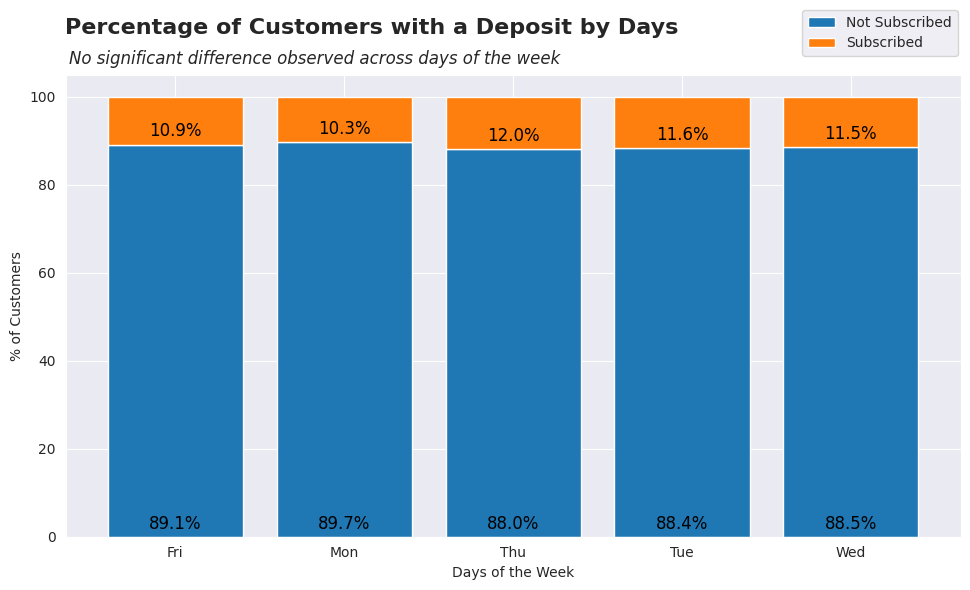

In [ ]:
df_day = bank.groupby('day_of_week')['y'].value_counts()
df_percentage = (df_day / df_day.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Days of the Week')
plt.ylabel('% of Customers')
ax.set_xticks(range(len(df_day.unstack().index)))
ax.set_xticklabels(df_day.unstack().index.str.title(), rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Days", fontsize=16, fontweight='bold')
plt.figtext(0.32, 0.885, "No significant difference observed across days of the week",
            ha='center', fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

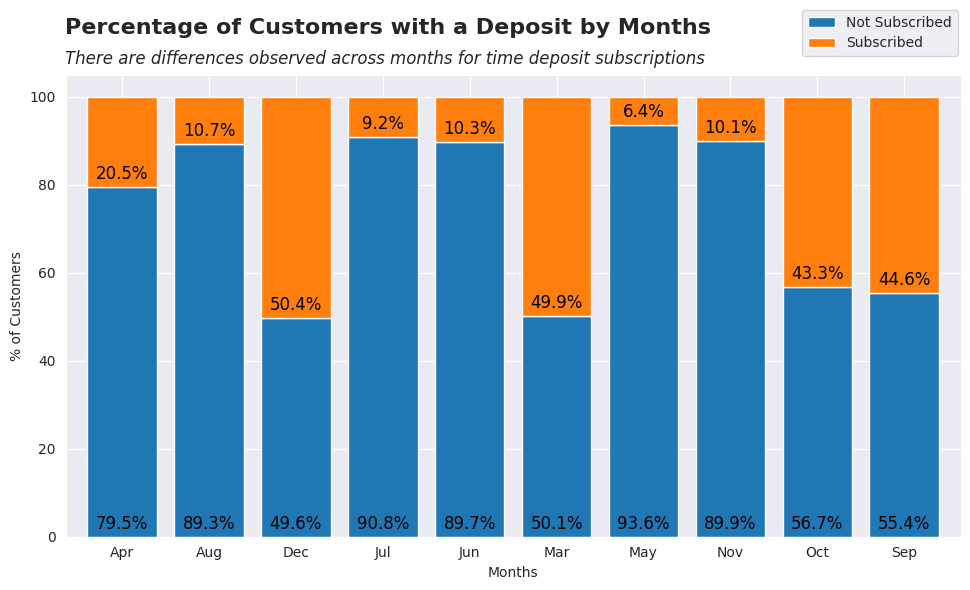

In [ ]:
df_month = bank.groupby('month')['y'].value_counts()
df_percentage = (df_month / df_month.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Months')
plt.ylabel('% of Customers')
ax.set_xticks(range(len(df_month.unstack().index)))
ax.set_xticklabels(df_month.unstack().index.str.title(), rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Months", fontsize=16, fontweight='bold')
plt.figtext(0.39, 0.885, "There are differences observed across months for time deposit subscriptions",
            ha='center', fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

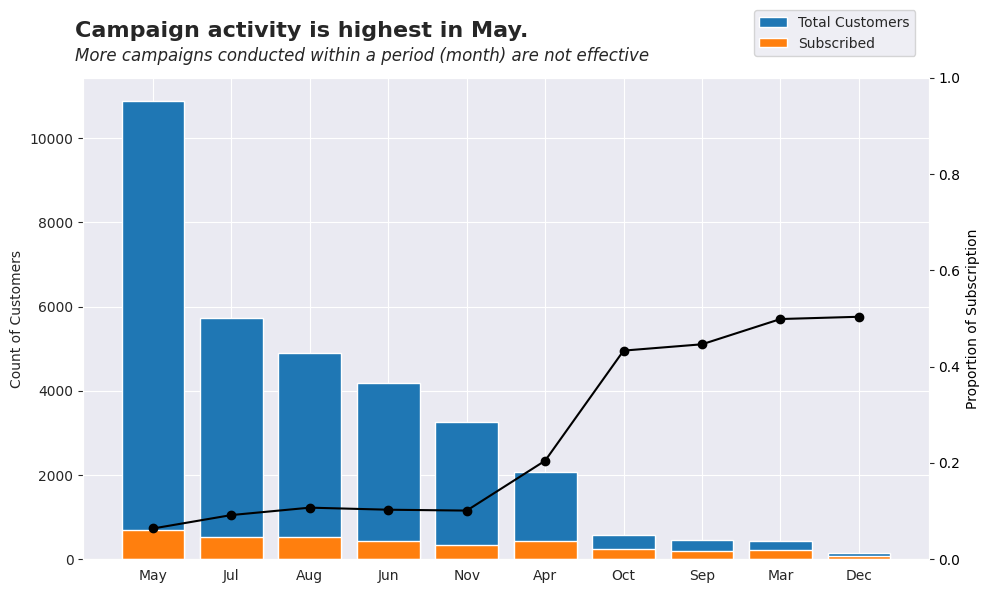

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bank['month'].value_counts().index, bank['month'].value_counts().values)
ax.bar(bank['month'].value_counts().index, bank[bank['y']=='yes']['month'].value_counts().loc[bank['month'].value_counts().index].values)
ax.set_ylabel('Count of Customers')
ax.set_xticks(range(len(bank['month'].value_counts().index)))
ax.set_xticklabels(bank['month'].value_counts().index.str.title(), rotation=0)
plt.legend(['Total Customers', 'Subscribed'], loc=2, bbox_to_anchor=(0.785, 1.155))

ax_prop = ax.twinx()
prop_yes = bank.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'].loc[bank['month'].value_counts().index]
ax_prop.plot(bank['month'].value_counts().index, prop_yes, marker='o', color='black')
ax_prop.set_ylabel('Proportion of Subscription', color='black')
ax_prop.set_ylim(0, 1)
ax_prop.tick_params(axis='y', labelcolor='black')
ax_prop.grid(False)

plt.figtext(0.08, 0.935, "Campaign activity is highest in May.", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "More campaigns conducted within a period (month) are not effective",
            fontsize=12, style='italic')

plt.tight_layout()
plt.show()

In [ ]:
bank[bank['y'] == 'yes']['month'].value_counts()

month
may    696
jul    525
aug    524
jun    431
apr    425
nov    329
oct    250
mar    215
sep    204
dec     71
Name: count, dtype: int64

**How does the last duration and number of times carried out during this contact campaign influence the customer's decision to subscribe to a term deposit?**

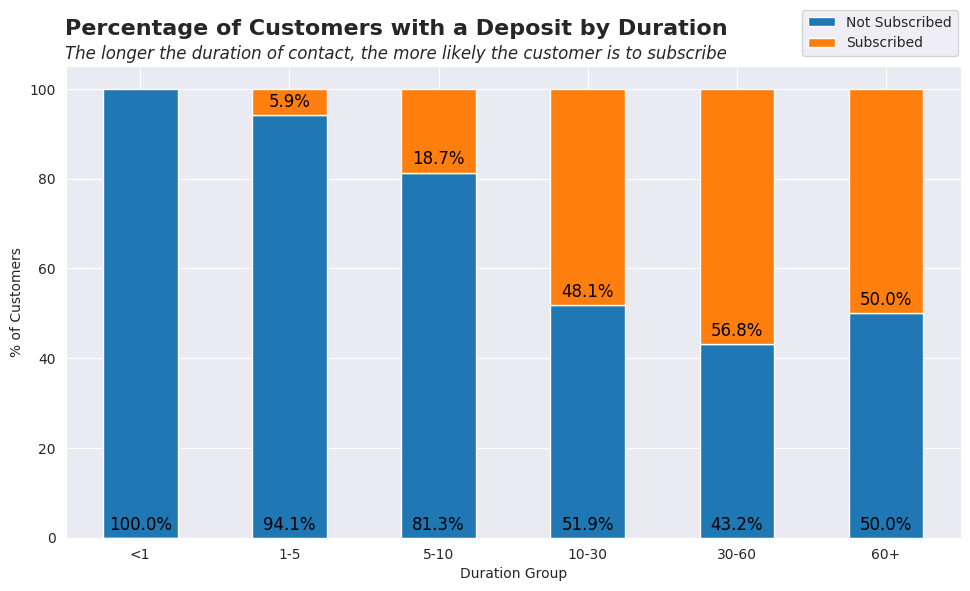

In [ ]:
bank['duration_minute'] = round(bank['duration'] / 60, 2)
bins_duration = [0, 1, 5, 10, 30, 60, np.inf]
labels_duration = ['<1', '1-5', '5-10', '10-30', '30-60', '60+']
bank['duration_group'] = pd.cut(bank['duration_minute'], bins=bins_duration, labels=labels_duration)

df_age = bank.groupby('duration_group')['y'].value_counts()
df_age_percentage = (df_age / df_age.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_age_percentage.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Duration Group')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Duration", fontsize=16, fontweight='bold')
plt.figtext(0.07, 0.895, "The longer the duration of contact, the more likely the customer is to subscribe",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))
plt.tight_layout()
plt.show()

In [ ]:
bank['duration_group'].value_counts()

duration_group
1-3      12991
3-5       7384
5-10      6143
<1        3370
10-30     2642
30-60       81
60+          4
Name: count, dtype: int64

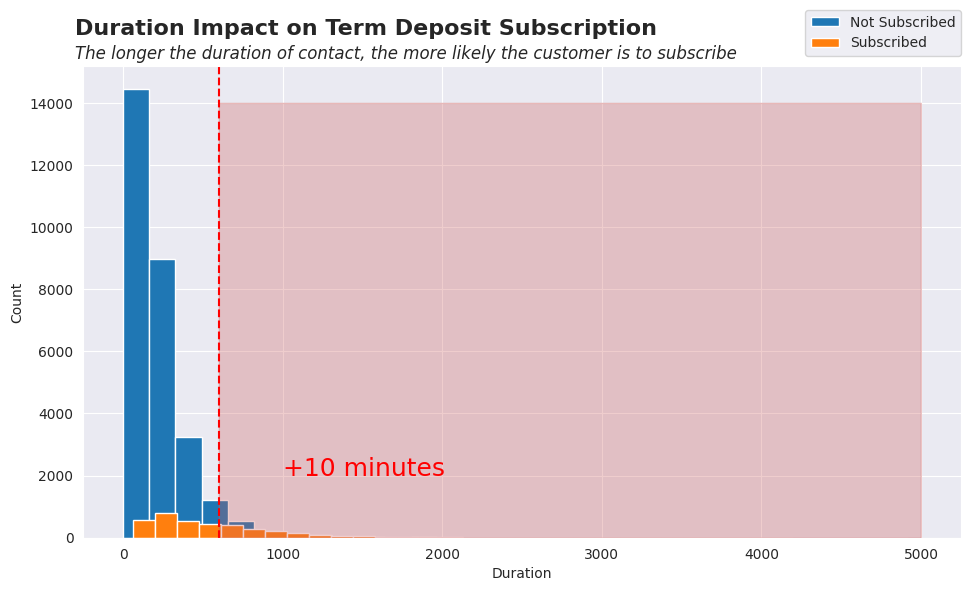

In [ ]:
plt.figure(figsize=(10,6))

plt.hist(data=bank[bank['y']=='no'], x='duration', bins=30)
plt.hist(data=bank[bank['y']=='yes'], x='duration', bins=30)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))

plt.figtext(0.08, 0.935, "Duration Impact on Term Deposit Subscription", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "The longer the duration of contact, the more likely the customer is to subscribe",
            fontsize=12, style='italic')

plt.axvline(600, ls='--', color='red')
plt.text(x=1000, y=2000, s='+10 minutes', fontsize=18, color='red', rotation=0)
plt.stackplot(np.arange(600,5000,1), [[14000]], color='indianred', alpha=0.3)

plt.tight_layout()
plt.show()

**How do the results of previous campaigns influence the success of the current campaign, namely term deposits?**

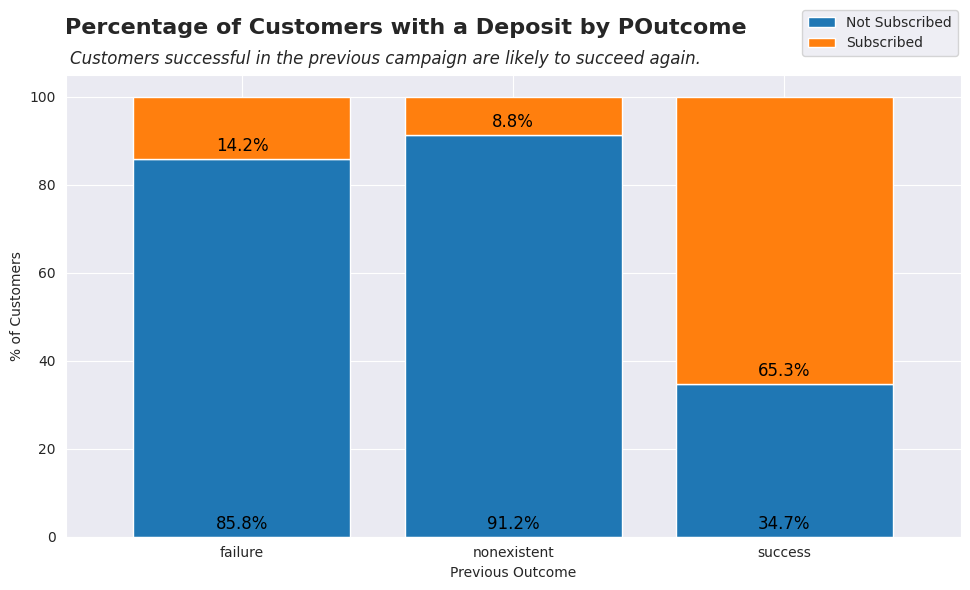

In [ ]:
df_poutcome = bank.groupby('poutcome')['y'].value_counts()
df_percentage = (df_poutcome / df_poutcome.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Previous Outcome')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by POutcome", fontsize=16, fontweight='bold')
plt.figtext(0.39, 0.885, "Customers successful in the previous campaign are likely to succeed again.",
            ha='center', fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

### **Multivariate Analysis**

In [ ]:
bank['subscribed'] = bank['y'].map({'yes':1, 'no':0})
num_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']

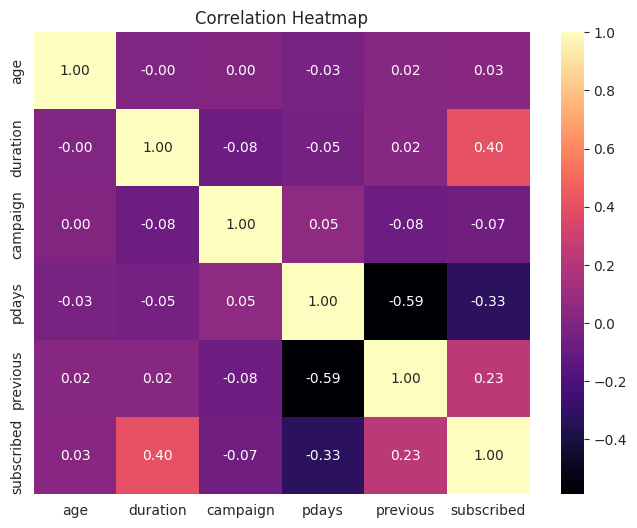

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(bank[num_col].corr(), annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## **Business Recommendation**

Based on the observations from the time deposit campaign data, here are some business recommendations:
- Focus marketing efforts on customers aged 30-40 years, as they constitute the majority of campaign participants. Additionally, consider targeting younger (students) and older (retirees) age groups, as they show higher subscription rates to term deposits.
- Focus on interactions lasting more than 5 minutes, as these have shown to significantly increase the likelihood of subscription. Allocate resources to enhance the quality and depth of these interactions to maximize impact.
- Recognize that higher education levels and single marital status correlate with higher subscription rates. Develop targeted marketing strategies that resonate with educated individuals and create specialized offerings for single customers.
- Aim for an optimal number of 2000 campaign activities per time period (month). Rather than increasing the frequency of campaigns, ensure each interaction is strategically planned and executed to maximize effectiveness.
- Implement retention strategies for customers who previously subscribed. Offer personalized incentives and loyalty programs to maintain engagement and foster long-term relationships.

By implementing these revised strategies, the campaign can optimize resources, enhance engagement with target segments, and improve overall subscription rates for term deposits effectively.